In [1]:
import numpy as np
import pandas as pd


In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dt.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
dt.shape

(614, 13)

In [5]:
#  cheking unique value of each string column

In [6]:
dt['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [7]:
# I will drop Loin id Column

In [8]:
# data information checking
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Observation
# Gender-> catagorical data & string value & missing value present
# Married-> catagorical data & string value & missing value presen
# Dependents-> catagorical data & string value & missing value presen
# Education-> catagorical data & string value. Ordinal data & No missing value
# Self_Employed-> Missing value present, Catagorical data & string value
# ApplicantIncome & CoapplicantIncome-> no missing value & continious data
# LoanAmount -> mising value present & continious data
# Loan_Amount-> Term-Missing data
# Credit_History -> Missing data & 
# Property_Area- no missing data & catagorical data
# Loan_Status - targete value. no missing value & catagorycal data

In [10]:
dt.drop(['Loan_ID'],axis=1,inplace=True) # droped loan id column

In [11]:
# cheking missing value(Nan)
dt.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# missing value is very small so we droped the missing value. it will not efect in result
dt.dropna(inplace=True)

In [13]:
dt.shape

(480, 12)

In [14]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
dt.drop_duplicates(inplace=True)    # droped duplicate if any

In [16]:
dt.shape

(480, 12)

In [17]:
# cheking NaN value
dt.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Now no NaN value is present in dataset.

In [19]:
dt['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [20]:
# it will trit get dummies encoder for fill string value to number

In [21]:
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df=lab_enc.fit_transform(dt['Gender'])   # male=1 & Female=0

dt['Gender']=df



In [22]:
df=lab_enc.fit_transform(dt['Married']) # Label encoder
dt['Married']=df                        # Married=0 & unmarried=1
                         

In [23]:
df=lab_enc.fit_transform(dt['Dependents']) # Label encoder
dt['Dependents']=df                        # 
                  

In [24]:
df=lab_enc.fit_transform(dt['Education']) # Label encoder
dt['Education']=df                        # Graduate=0 & not graduate=1
                  

In [25]:
df=lab_enc.fit_transform(dt['Self_Employed']) # Label encoder
dt['Self_Employed']=df                        # self Emp=1, not self emp=0
                  

In [26]:

df=lab_enc.fit_transform(dt['Property_Area']) # Label encoder
dt['Property_Area']=df                        # Rural=0, Urban=2, Semiurban=1
                  

In [27]:
df=lab_enc.fit_transform(dt['Loan_Status']) # Label encoder
dt['Loan_Status']=df                        # yes=1 & No=0

In [28]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [29]:
dt.Education.value_counts()

0    383
1     97
Name: Education, dtype: int64

In [30]:
dt.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [31]:
# Observation
# Applicantincome-> Mean & std not okay, present skewness & outlier.
# CoapplicantIncome-> Mean & std not okay, present skewness & outlier.
# LoanAmount-> Mean & std not okay.present skewness & outlier.
# Loan_Amount_Term-> Mean & std okay.present skewness & outlier.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

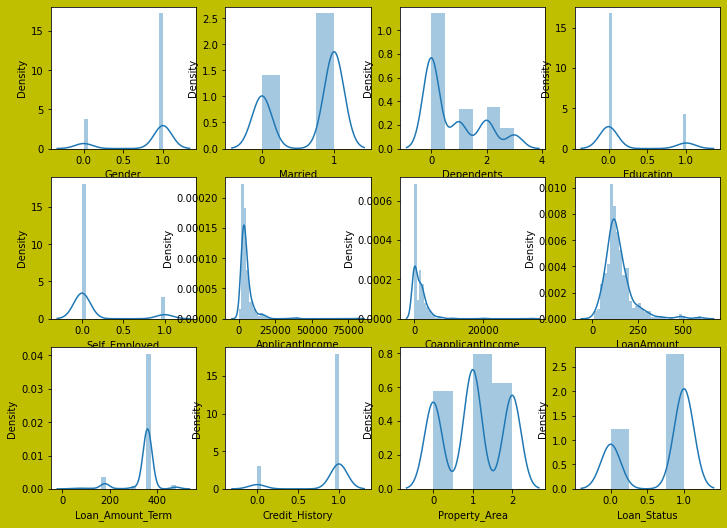

In [33]:
# cheking data distributed
plt.figure(figsize=(12,12),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

In [34]:
# Observation
# ApplicantIncome- data not normal distributed . skewness & outlier present. Will use Z score for handling the outlier
# CoapplicantIncome- data not normal distributed . skewness & outlier present. Will use Z score for handling the outlier
# LoanAmount- data normal distributed . skewness & outlier present. Will use Z score for handling the outlier
# Loan_Amount_Term- data not normal distributed . skewness & outlier present. Will use Z score for handling the outlier

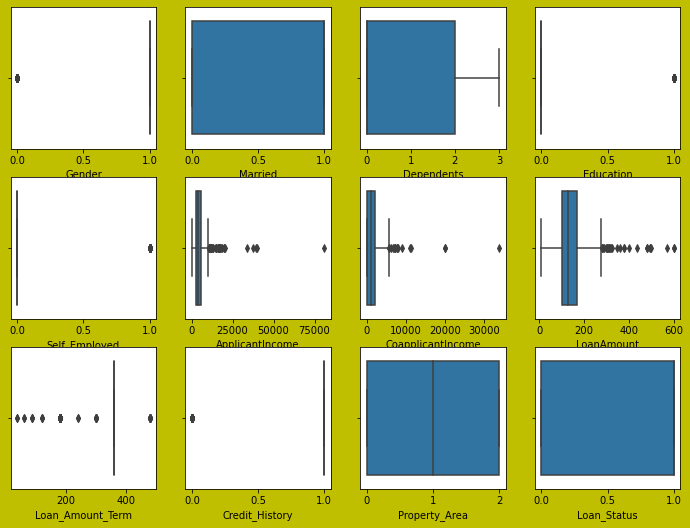

In [35]:
# Cheking Outlier
# cheking data distributed
plt.figure(figsize=(12,12),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

In [36]:
# Observation
# ApplicantIncome-  outlier present. Will use Z score for handling the outlier
# CoapplicantIncome-  outlier present. Will use Z score for handling the outlier
# LoanAmount-  outlier present. Will use Z score for handling the outlier
# Loan_Amount_Term-  outlier present. Will use Z score for handling the outlier

In [37]:
# Trit z score for remove outlier
from scipy.stats import zscore

In [38]:
z_score=zscore(dt[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)

filter=(abs_z_score<3).all(axis=1)

dt=dt[filter]

In [39]:
dt.shape

(452, 12)

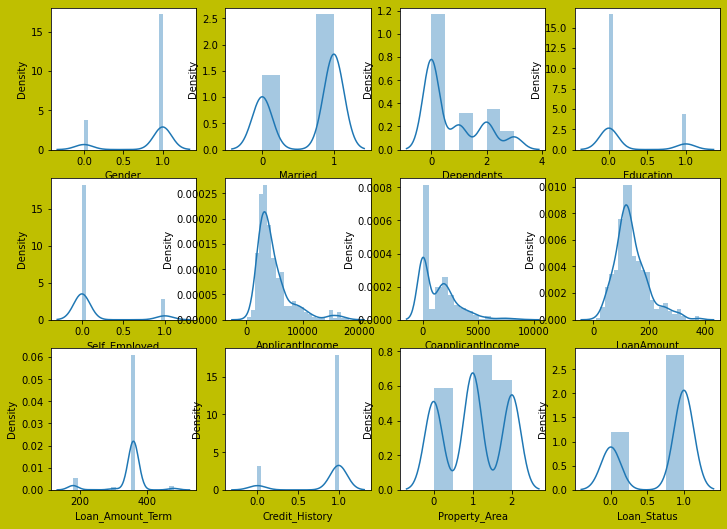

In [40]:
# cheking data distributed
plt.figure(figsize=(12,12),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

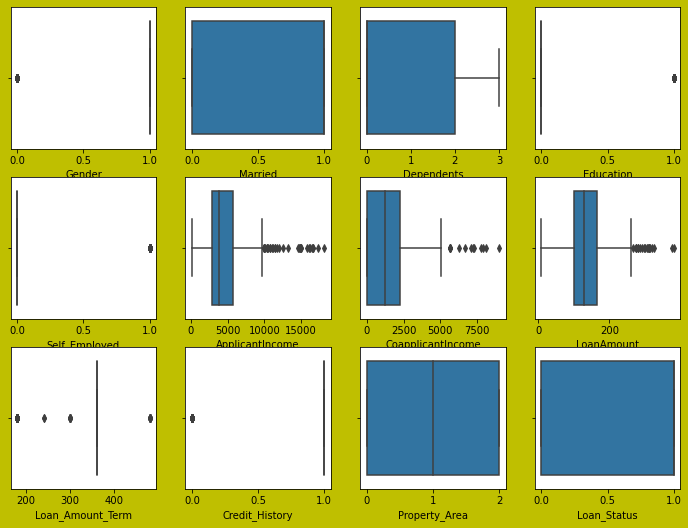

In [41]:
# cheking data distributed
plt.figure(figsize=(12,12),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

In [42]:
#  Minimize outlier using by Z distrubtion method


In [43]:
# cheking correlation
dt.corr().abs()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369156,0.226604,0.057334,0.005052,0.003005,0.190373,0.154331,0.122491,0.029812,0.001366,0.079204
Married,0.369156,1.000000,0.377141,0.016874,0.013501,0.025045,0.222099,0.170155,0.152527,0.040761,0.044726,0.116421
Dependents,0.226604,0.377141,1.000000,0.036946,0.028212,0.091463,0.004014,0.149376,0.087609,0.004263,0.001581,0.042329
Education,0.057334,0.016874,0.036946,1.000000,0.004367,0.153428,0.052811,0.159058,0.100425,0.062384,0.063365,0.079833
Self_Employed,0.005052,0.013501,0.028212,0.004367,1.000000,0.298330,0.043520,0.122853,0.034785,0.041666,0.053012,0.060823
ApplicantIncome,0.003005,0.025045,0.091463,0.153428,0.298330,1.000000,0.212510,0.469716,0.052925,0.033721,0.012915,0.009277
CoapplicantIncome,0.190373,0.222099,0.004014,0.052811,0.043520,0.212510,1.000000,0.327555,0.074387,0.034320,0.061118,0.037253
LoanAmount,0.154331,0.170155,0.149376,0.159058,0.122853,0.469716,0.327555,1.000000,0.029620,0.007933,0.088158,0.029732
Loan_Amount_Term,0.122491,0.152527,0.087609,0.100425,0.034785,0.052925,0.074387,0.029620,1.000000,0.070186,0.034636,0.006931
Credit_History,0.029812,0.040761,0.004263,0.062384,0.041666,0.033721,0.034320,0.007933,0.070186,1.000000,0.012098,0.554435


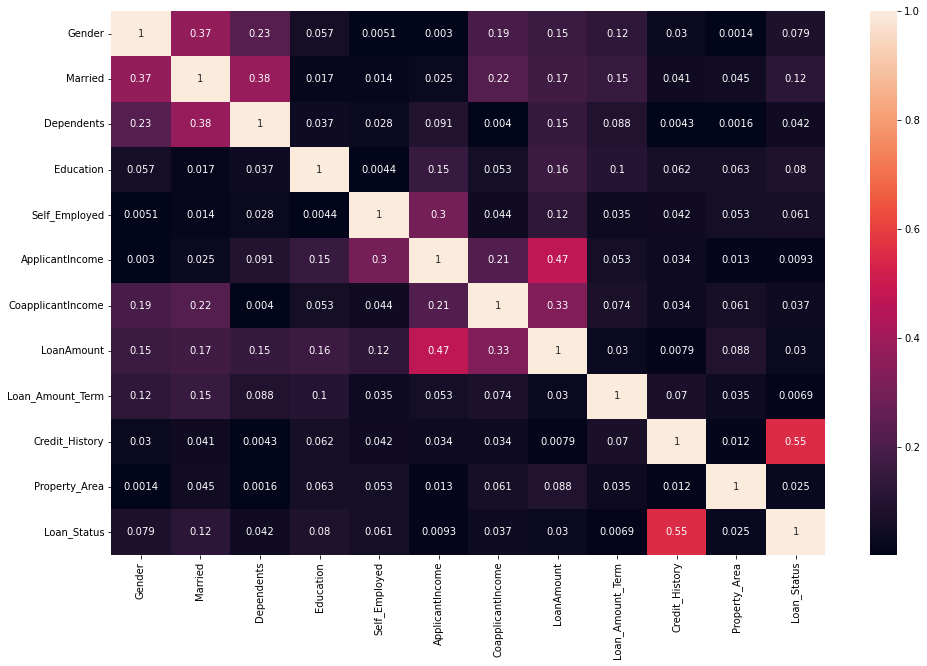

In [44]:
# corrilation with heat map
plt.figure(figsize=(16,10))
sns.heatmap(dt.corr().abs(),annot=True)
plt.show()

In [45]:
# Observasion
# loan_status with
# 1 geneder- relation 7.9%
# 2 Married- relation 12%
# 3 Dependents- relation 4.2 %
# 4 Education- relation 8%
# 5 self Employed- relation 6.1%
# 6 Applicantincome- relation 0.93 % 
# 7 coapplicantIncome-relation 3.7%
# 8 loanAmount- relation 3%
# 9 Loan_amount _Term- relation 0.69%
# 10 Credit_History- relation 55% . good relationship
# 11 Property_Area- relation 2.5%

In [46]:
x=dt.drop(['Loan_Status'],axis=1)
y=dt.Loan_Status

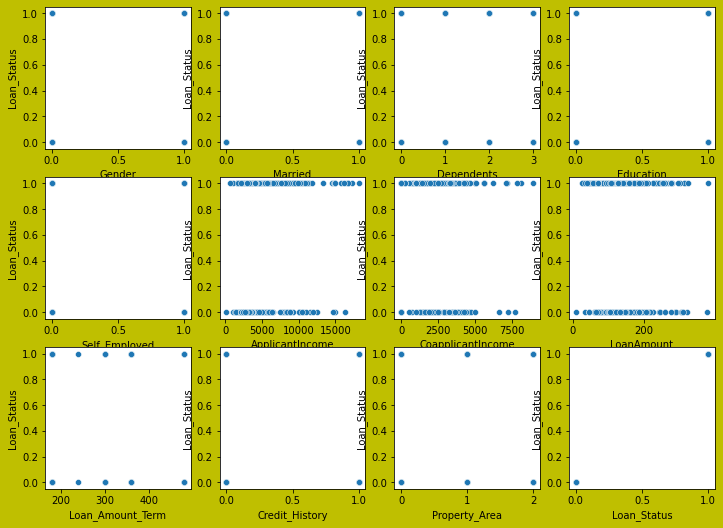

In [47]:
# cheking correlationship between lable & feature
plt.figure(figsize=(12,12),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(dt[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Loan_Status')
    plotnumber+=1
plt.show()

In [48]:
x.corrwith(y) # correlation with lable & feature

Gender               0.079204
Married              0.116421
Dependents           0.042329
Education           -0.079833
Self_Employed       -0.060823
ApplicantIncome      0.009277
CoapplicantIncome    0.037253
LoanAmount          -0.029732
Loan_Amount_Term    -0.006931
Credit_History       0.554435
Property_Area        0.024757
dtype: float64

<AxesSubplot:>

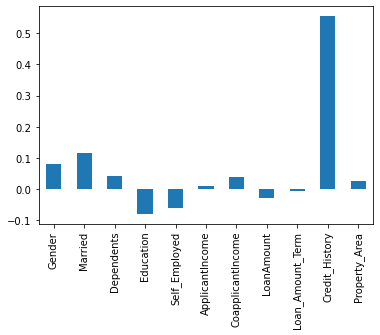

In [49]:
# see in graph correlationship between lable & feature
x.corrwith(y).plot(kind='bar')

In [50]:
# observesion
# Credit_history-> relationshiop is strong

In [51]:
# handel multicolinearity problem
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,6.293660,Gender
1,3.800456,Married
2,1.886345,Dependents
3,1.287440,Education
4,1.274628,Self_Employed
5,6.009283,ApplicantIncome
6,2.478635,CoapplicantIncome
7,11.521433,LoanAmount
8,13.070378,Loan_Amount_Term
9,6.513130,Credit_History


In [53]:
# Multicolinearity problem have in column Loan_Amount_term. So we drop it
x=x.drop(['Loan_Amount_Term'],axis=1)

In [54]:
# find skewness in data
dt.skew()

Gender              -1.658936
Married             -0.602600
Dependents           0.973964
Education            1.443921
Self_Employed        2.200742
ApplicantIncome      1.980989
CoapplicantIncome    1.405169
LoanAmount           1.064924
Loan_Amount_Term    -2.010659
Credit_History      -1.986572
Property_Area       -0.038700
Loan_Status         -0.871173
dtype: float64

In [55]:
# handel skewness usinf power transformer tecnique
from sklearn.preprocessing import PowerTransformer 
pt=PowerTransformer()

In [56]:
x_new=pt.fit_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)
x.skew()

Gender              -1.658936
Married             -0.602600
Dependents           0.431911
Education            1.443921
Self_Employed        2.200742
ApplicantIncome      0.006596
CoapplicantIncome   -0.161790
LoanAmount           0.041624
Credit_History      -1.986572
Property_Area       -0.148046
dtype: float64

In [57]:
# Standarized the data using by standers Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scler=scaler.fit_transform(x)   # standarized the feature data

In [58]:
# Cheking Imbalance or not

In [59]:
y.value_counts()

1    316
0    136
Name: Loan_Status, dtype: int64

In [62]:
# Handle imbalance Dataset by using SMOTE (up Sampeling)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scler,y,test_size=.25, random_state=88)

In [64]:
over_samp=SMOTE(0.75)
x_train_ns,y_train_ns=over_samp.fit_resample(x_train,y_train)

In [65]:
y_train.value_counts()

1    236
0    103
Name: Loan_Status, dtype: int64

In [66]:
y_train_ns.value_counts()

1    236
0    177
Name: Loan_Status, dtype: int64

### Create Model of LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report


In [68]:
# train the data
from sklearn.model_selection import train_test_split

x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scler,y,test_size=.25, random_state=88)

In [69]:
# creat function
def metric_score(clf,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        pred=clf.predict(x_train_ns)
        print('\n===========Train Result=========')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n===========Test Result=========')
        print(f'Accuracy Score : {accuracy_score(y_test,y_pred)*100:0.2f}%')
        
        print(classification_report(y_test,y_pred,digits=2))
        

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(x_train_ns,y_train_ns)   # Model created

LogisticRegression()

In [72]:
metric_score(lr, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(lr, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.89%

===========Test Result=========
Accuracy Score : 79.65%
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        33
           1       0.78      0.99      0.87        80

    accuracy                           0.80       113
   macro avg       0.85      0.66      0.68       113
weighted avg       0.82      0.80      0.76       113



In [73]:
# cheking Cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_scler,y,cv=5).mean()

0.8186568986568987

In [74]:
# Model is not overfitting. Cross val Score is 82%. as same with traing score

### Create KNN Model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [76]:
# creat function
def metric_score(clf,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        pred=clf.predict(x_train_ns)
        print('\n===========Train Result=========')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n===========Test Result=========')
        print(f'Accuracy Score : {accuracy_score(y_test,y_pred)*100:0.2f}%')
        
        print(classification_report(y_test,y_pred,digits=2))

In [77]:
metric_score(knn, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(knn, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.60%

===========Test Result=========
Accuracy Score : 77.88%
              precision    recall  f1-score   support

           0       0.75      0.36      0.49        33
           1       0.78      0.95      0.86        80

    accuracy                           0.78       113
   macro avg       0.77      0.66      0.67       113
weighted avg       0.77      0.78      0.75       113



In [78]:
cross_val_score(knn,x_scler,y,cv=5).mean()

0.7877899877899878

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# # Hyperparameter tuning use for improve the accuracy score
# param={'n_neighbors':[5,10,15,20,25,30],
#        'algorithm': ['kd_tree', 'brute'],
#        'leaf_size': [range(20,30)],
        
#       }

In [81]:
# fixed the parameter 
param={'algorithm':['kd_tree','brute'],
      'leaf_size':[10,12,14,15,16,18,19,20],
      'n_neighbors':[9,11,13,15,17,19,21]}

In [82]:
grid=GridSearchCV(knn,param_grid=param)
grid.fit(x_train_ns,y_train_ns)
best_param=grid.best_params_

In [84]:
best_param

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 19}

In [85]:
knn=KNeighborsClassifier(algorithm= 'kd_tree', leaf_size= 10, n_neighbors= 19)
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=19)

In [86]:
metric_score(knn, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(knn, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.30%

===========Test Result=========
Accuracy Score : 76.11%
              precision    recall  f1-score   support

           0       0.88      0.21      0.34        33
           1       0.75      0.99      0.85        80

    accuracy                           0.76       113
   macro avg       0.81      0.60      0.60       113
weighted avg       0.79      0.76      0.70       113



In [87]:
# Observation
# Result not improving post hyperparameter tuming

### Create Decision Tree Model

In [91]:
from sklearn.tree import DecisionTreeClassifier  #import model
dtree=DecisionTreeClassifier()

In [92]:
dtree.fit(x_train_ns,y_train_ns) # train data

DecisionTreeClassifier()

In [93]:
# Call Function

metric_score(dtree, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(dtree, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 100.00%

===========Test Result=========
Accuracy Score : 68.14%
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        33
           1       0.78      0.76      0.77        80

    accuracy                           0.68       113
   macro avg       0.62      0.62      0.62       113
weighted avg       0.69      0.68      0.68       113



In [95]:
cross_val_score(dtree,x_scler,y,cv=5).mean()    # Model overfitting

0.7433943833943835

In [98]:
# Hyperperameter Tuning to improve result
# fixed the parameter to find best parameter
param={'criterion':['gini','entropy'],
      'max_depth':range(3,10),
      'min_samples_leaf':range(2,9),
      'min_samples_split':range(2,8),
      'max_leaf_nodes':range(2,10)}

In [99]:
grid_tree=GridSearchCV(dtree,param_grid=param)
grid_tree.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_leaf': range(2, 9),
                         'min_samples_split': range(2, 8)})

In [100]:
grid_tree.best_params_   # Best parameter

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [101]:
dtree=DecisionTreeClassifier(criterion= 'gini',   # train data along with best parameter
 max_depth= 3,
 max_leaf_nodes= 2,
 min_samples_leaf= 2,
 min_samples_split= 2)
dtree.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2, min_samples_leaf=2)

In [102]:
# Call Function
metric_score(dtree, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(dtree, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.89%

===========Test Result=========
Accuracy Score : 79.65%
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        33
           1       0.78      0.99      0.87        80

    accuracy                           0.80       113
   macro avg       0.85      0.66      0.68       113
weighted avg       0.82      0.80      0.76       113



In [103]:
# Observetion
#  Now train & test result is good.

### Create Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [105]:
ran.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [106]:
# Call Function

metric_score(ran, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(ran, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 100.00%

===========Test Result=========
Accuracy Score : 78.76%
              precision    recall  f1-score   support

           0       0.85      0.33      0.48        33
           1       0.78      0.97      0.87        80

    accuracy                           0.79       113
   macro avg       0.81      0.65      0.67       113
weighted avg       0.80      0.79      0.75       113



In [107]:
# Observation
# Train result is 100% * Test Result is 78.76%

In [108]:
cross_val_score(ran,x_scler,y,cv=5).mean()  # Cheking Cross val Score

0.8009279609279609

In [109]:
# Cross val Score is Good 

In [112]:
# Using Hyperparameter tuning to improve score

# Score improvement by using Hyperparameter technique

param_ran={'n_estimators':[10,12,15,17,18],
           'criterion':['gini','entropy'],
           'max_depth': range(10,15),
           'min_samples_split':range(15,20),
           'min_samples_leaf':range(15,20)}

In [113]:
grid_ran=GridSearchCV(ran,param_grid=param_ran)
grid_ran.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(15, 20),
                         'min_samples_split': range(15, 20),
                         'n_estimators': [10, 12, 15, 17, 18]})

In [114]:
grid_ran.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 16,
 'min_samples_split': 18,
 'n_estimators': 12}

In [115]:
ran=RandomForestClassifier(criterion= 'gini',
 max_depth= 14,
 min_samples_leaf= 16,
 min_samples_split= 18,
 n_estimators= 12)
ran.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=14, min_samples_leaf=16, min_samples_split=18,
                       n_estimators=12)

In [116]:
# Call Function

metric_score(ran, x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(ran, x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.89%

===========Test Result=========
Accuracy Score : 79.65%
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        33
           1       0.78      0.99      0.87        80

    accuracy                           0.80       113
   macro avg       0.85      0.66      0.68       113
weighted avg       0.82      0.80      0.76       113



In [117]:
# Observation
#  Now result is good. Train result 82.89 & Test result 79.65%

### Adaboosting Model

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)

AdaBoostClassifier()

In [127]:
# Checking Score of accuracy,& classification report

metric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 86.14%

===========Test Result=========
Accuracy Score : 75.22%
              precision    recall  f1-score   support

           0       0.67      0.30      0.42        33
           1       0.77      0.94      0.84        80

    accuracy                           0.75       113
   macro avg       0.72      0.62      0.63       113
weighted avg       0.74      0.75      0.72       113



In [121]:
# Result is good

In [128]:
#  Cheking cross val score, model overfitting or not
cross_val_score(ada,x_scler,y,cv=5).mean()

0.7810989010989011

In [123]:
# Model is not overfitting

In [124]:
# Score improvement by using Hyperparameter technique

param_ada={'n_estimators' : [20,30,40,50],
    'learning_rate' :[ 0.01,0.1,0.20,0.25]}

In [129]:
grid_search=GridSearchCV(ada,param_grid=param_ada)
grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.25],
                         'n_estimators': [20, 30, 40, 50]})

In [130]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

In [132]:
ada=AdaBoostClassifier(learning_rate = 0.01, n_estimators = 20)
ada.fit(x_train_ns,y_train_ns)

AdaBoostClassifier(learning_rate=0.01, n_estimators=20)

In [133]:
# Checking Score of accuracy,& classification report

metric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 82.89%

===========Test Result=========
Accuracy Score : 79.65%
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        33
           1       0.78      0.99      0.87        80

    accuracy                           0.80       113
   macro avg       0.85      0.66      0.68       113
weighted avg       0.82      0.80      0.76       113



In [134]:
# Test result improve to 79.65%

### Create SVM Model

In [135]:
from sklearn.svm import SVC

In [136]:
Svm=SVC()

In [137]:
Svm.fit(x_train_ns,y_train_ns)

SVC()

In [138]:
# Checking Score of accuracy,& classification report

metric_score(Svm,x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(Svm,x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 83.19%

===========Test Result=========
Accuracy Score : 79.65%
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        33
           1       0.78      0.99      0.87        80

    accuracy                           0.80       113
   macro avg       0.85      0.66      0.68       113
weighted avg       0.82      0.80      0.76       113



In [139]:
#  Result is good Train result 83.19% & Test Result 79.65%

In [140]:
cross_val_score(Svm,x_scler,y,cv=5).mean()

0.820879120879121

In [141]:
#  Model is not Overfitting

### Create GradientBoosting Classifier model 

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
Grdnt=GradientBoostingClassifier()
Grdnt.fit(x_train_ns,y_train_ns)

GradientBoostingClassifier()

In [144]:
# Checking Score of accuracy,& classification report

metric_score(Grdnt,x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(Grdnt,x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 93.22%

===========Test Result=========
Accuracy Score : 75.22%
              precision    recall  f1-score   support

           0       0.69      0.27      0.39        33
           1       0.76      0.95      0.84        80

    accuracy                           0.75       113
   macro avg       0.73      0.61      0.62       113
weighted avg       0.74      0.75      0.71       113



In [145]:
cross_val_score(Grdnt, x_scler, y, cv=5).mean()

0.7833211233211232

In [146]:
# Score improvement by using Hyperparameter technique

param_grdnt={'n_estimators' : [20,30,40,50],
    'learning_rate' :[ 0.01,0.1,0.20,0.25]}

In [147]:
grid_grdnt=GridSearchCV(Grdnt,param_grid=param_grdnt)
grid_grdnt.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.25],
                         'n_estimators': [20, 30, 40, 50]})

In [148]:
grid_grdnt.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [149]:
Grdnt=GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 20)
Grdnt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=20)

In [150]:
# Checking Score of accuracy,& classification report

metric_score(Grdnt,x_train_ns,x_test,y_train_ns,y_test,train=True)
metric_score(Grdnt,x_train_ns,x_test,y_train_ns,y_test,train=False)


===========Train Result=========
Accuracy Score : 88.50%

===========Test Result=========
Accuracy Score : 76.99%
              precision    recall  f1-score   support

           0       0.82      0.27      0.41        33
           1       0.76      0.97      0.86        80

    accuracy                           0.77       113
   macro avg       0.79      0.62      0.63       113
weighted avg       0.78      0.77      0.73       113



In [151]:
# Test result improve to 77%

In [152]:
# Roc AUC Curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

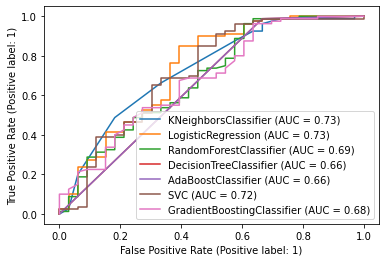

In [164]:
# Graph of AUC for Test Data
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Grdnt,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

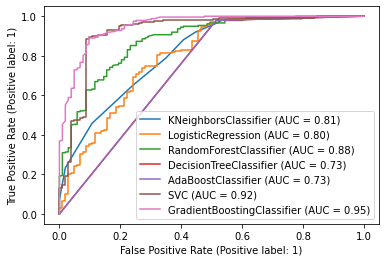

In [165]:
# Graph of AUC for Train Data
disp=plot_roc_curve(knn,x_train_ns,y_train_ns)
plot_roc_curve(lr,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ran,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(dtree,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(Svm,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(Grdnt,x_train_ns,y_train_ns,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [166]:
#  As per AUC curve we can go through knn & LogisticRegresion model. Bcz test result of both models are close to train result.

In [167]:
import pickle

In [169]:
pickle.dump(knn,open('KNeighborsClassifier','wb'))

In [170]:
pickle.dump(lr,open('LogisticRegression','wb'))